# Etapa 01) Análise exploratória dos dados (DataUnderstanding)

In [40]:
# Importando as bibliotecas iniciais para analise
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [41]:
# Importando DataFrame como df
df = pd.read_csv("streaming_data.csv")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,NaN,3,NaN,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,NaN,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,NaN,5.0,Basic,NaN,2,NaN,NaN,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
4,18.0,NaN,1948.0,3.0,Basic,NaN,3,3.88,0.0,14879bcb-1977-4ad8-a7f9-6aa9bf7b872f


In [42]:
# Descrição Estatística
df.describe()

,Age,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Churned
count,66607.000000,56464.000000,52696.000000,9572.000000,77884.000000,60614.000000,61148.000000
mean,43.511072,4385.848505,2.995370,2.496239,3.002273,3.002252,0.243066
std,15.043158,2526.580859,1.414072,1.120700,1.413235,1.154963,0.428938
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,30.000000,2196.000000,2.000000,1.000000,2.000000,1.990000,0.000000
50%,43.000000,4384.000000,3.000000,2.000000,3.000000,3.010000,0.000000
75%,57.000000,6573.000000,4.000000,4.000000,4.000000,4.000000,0.000000
max,69.000000,8759.000000,5.000000,4.000000,5.000000,5.000000,1.000000


In [43]:
# Tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77884 entries, 0 to 77883
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     66607 non-null  float64
 1   Gender                  63368 non-null  object 
 2   Time_on_platform        56464 non-null  float64
 3   Devices_connected       52696 non-null  float64
 4   Subscription_type       52663 non-null  object 
 5   Num_streaming_services  9572 non-null   float64
 6   Num_active_profiles     77884 non-null  int64  
 7   Avg_rating              60614 non-null  float64
 8   Churned                 61148 non-null  float64
 9   User_id                 77884 non-null  object 
dtypes: float64(6), int64(1), object(3)
memory usage: 5.9+ MB


In [44]:
# Verificando a existência de dados nulos
df.isna().sum()

Age                       11277
Gender                    14516
Time_on_platform          21420
Devices_connected         25188
Subscription_type         25221
Num_streaming_services    68312
Num_active_profiles           0
Avg_rating                17270
Churned                   16736
User_id                       0
dtype: int64

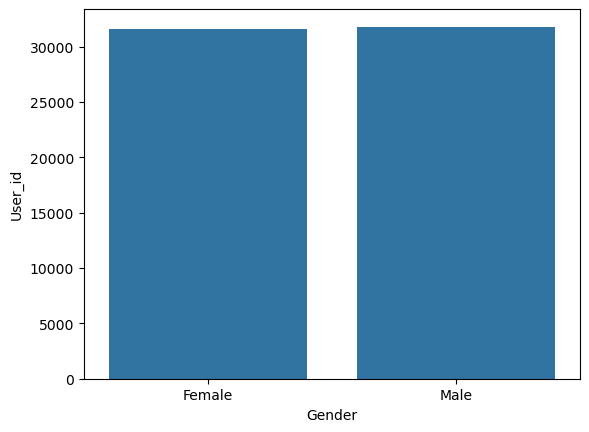

In [45]:
# Quantidade de usúarios por gênero
gender = df.groupby("Gender")["User_id"].agg("count").reset_index()
sns.barplot(gender, x="Gender", y="User_id");

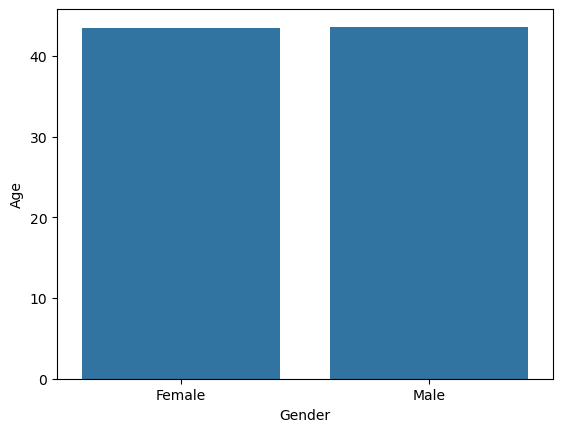

In [46]:
# Média de idade por gênero
age = df.groupby("Gender")["Age"].agg("mean").reset_index()
sns.barplot(age, x="Gender", y="Age");

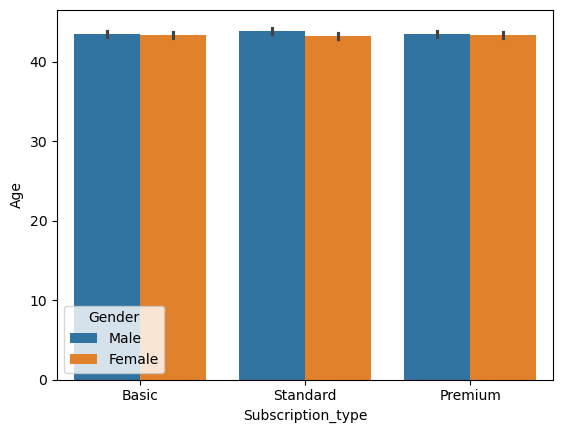

In [47]:
# Média de idade por gênero e por tipo de subscrição
subs = df.groupby(["Subscription_type", "Gender"])["Age"].agg("mean").reset_index()
sns.barplot(df, x="Subscription_type", y="Age", hue="Gender");

<Axes: xlabel='Subscription_type', ylabel='User_id'>

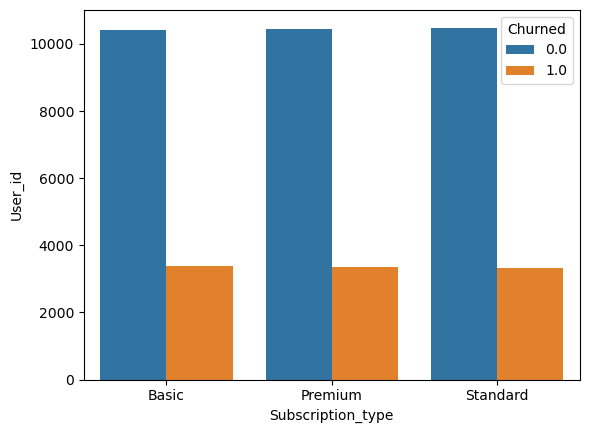

In [48]:
# Quantidade de Churned por Subscrição
churn = df.groupby(["Subscription_type", "Churned"])["User_id"].agg("count").reset_index()
sns.barplot(churn, x="Subscription_type", y="User_id", hue="Churned")

# Etapa 02) Tratamento dos Dados (Data Preparation)

In [49]:
# Substituindo valores nulos da coluna [Time_on_platform, Num_streaming_services, Churned, Avg_rating, Devices_connected] por 0
for c in ["Time_on_platform", "Num_streaming_services", "Churned", "Avg_rating", "Devices_connected"]:
    df[c] = df[c].fillna(0)

In [50]:
# Dropando linhas nulas das colunas [Gender, Subscription_type, Age]
df.dropna(subset=["Gender", "Subscription_type", "Age"], inplace=True)

In [51]:
# Plotando DataFrame
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,0.0,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,0.0,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,1.0,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,0.0,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,0.0,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [52]:
# Substituindo valores 0 e 1 por Yes e No na coluna Churned
df["Churned"] = df["Churned"].apply(lambda x: "No" if x == 0 else "Yes")
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49.0,Male,4700.0,3.0,Basic,0.0,3,0.00,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69.0,Female,6107.0,2.0,Standard,0.0,1,2.14,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44.0,Male,6374.0,3.0,Premium,1.0,1,1.91,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26.0,Male,0.0,5.0,Basic,0.0,2,0.00,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54.0,Male,3024.0,2.0,Basic,0.0,1,0.00,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


In [53]:
# Transformando valores tipo float em tipo int
df = df.map(lambda x: int(x) if isinstance(x, float) else x)
df.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating,Churned,User_id
0,49,Male,4700,3,Basic,0,3,0,No,a271aa56-bcfc-4f0a-91f7-b773de6b86a4
1,69,Female,6107,2,Standard,0,1,2,No,fe14b048-770b-4619-8ec6-485b0969ae31
2,44,Male,6374,3,Premium,1,1,1,Yes,0283dffd-6684-4a05-9c6f-c02098a6849d
3,26,Male,0,5,Basic,0,2,0,No,c316f2f5-3403-4a0a-82c2-c98e4b3379d2
5,54,Male,3024,2,Basic,0,1,0,No,a1df3a13-9255-4d00-8a9d-20565fefaab9


# Etapa 03) Modelagem dos Dados - Regressão Logística

In [54]:
# Separando X e y
X = df.drop(columns=["Churned", "User_id"]).copy()
y = df[["Churned"]].copy()

In [55]:
# Importando LabelEncoder
from sklearn.preprocessing import LabelEncoder

In [56]:
# Visualizando X
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Subscription_type,Num_streaming_services,Num_active_profiles,Avg_rating
0,49,Male,4700,3,Basic,0,3,0
1,69,Female,6107,2,Standard,0,1,2
2,44,Male,6374,3,Premium,1,1,1
3,26,Male,0,5,Basic,0,2,0
5,54,Male,3024,2,Basic,0,1,0


In [57]:
# Utilizando do processo de LabelEncoder para transformar a coluna categorica Gender em númerica
encoder = LabelEncoder()
X["Gender"] = encoder.fit_transform(X["Gender"])

In [58]:
# Transformando categoricas em númericas
X = pd.get_dummies(X, dtype=int)
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,49,1,4700,3,0,3,0,1,0,0
1,69,0,6107,2,0,1,2,0,0,1
2,44,1,6374,3,1,1,1,0,1,0
3,26,1,0,5,0,2,0,1,0,0
5,54,1,3024,2,0,1,0,1,0,0


In [59]:
# Importando MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [60]:
# Normalizando os dados
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X.head()

,Age,Gender,Time_on_platform,Devices_connected,Num_streaming_services,Num_active_profiles,Avg_rating,Subscription_type_Basic,Subscription_type_Premium,Subscription_type_Standard
0,0.366193,0.994075,0.525837,0.527504,-0.340192,0.004632,-1.359435,1.417502,-0.709388,-0.706468
1,1.691401,-1.005961,1.009474,-0.021766,-0.340192,-1.410847,0.034138,-0.705466,-0.709388,1.415493
2,0.034891,0.994075,1.101252,0.527504,0.759207,-1.410847,-0.662648,-0.705466,1.409665,-0.706468
3,-1.157796,0.994075,-1.089724,1.626045,-0.340192,-0.703107,-1.359435,1.417502,-0.709388,-0.706468
4,0.697495,0.994075,-0.050265,-0.021766,-0.340192,-1.410847,-1.359435,1.417502,-0.709388,-0.706468


In [61]:
# Importando função train_test_split
from sklearn.model_selection import train_test_split

In [62]:
# Separando dados em treino e test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42, stratify=y)

In [63]:
# Importando a função SMOTE da bibliote imbalaced-learn
from imblearn.over_sampling import SMOTE

In [64]:
# Resolvendo problemas de desbalanciamento nos dados
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train.values.ravel())

In [65]:
# Importando LogisticRegression
from sklearn.linear_model import LogisticRegression

In [66]:
# Treinando modelo de LogisticRegressiom
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [67]:
# Importando ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay

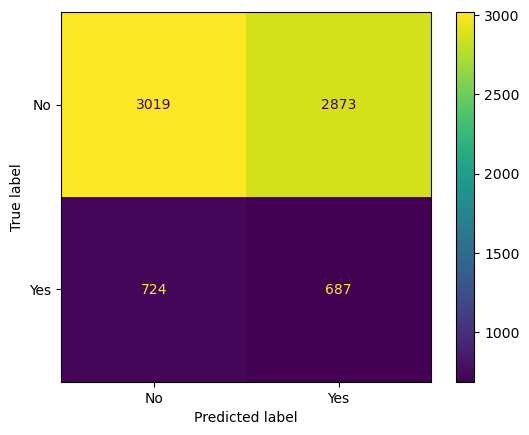

In [68]:
# Plotando matrix de confusão
ConfusionMatrixDisplay.from_estimator(lr, X_test, y_test);

In [69]:
# Importando métricas
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, roc_auc_score, recall_score, precision_score

In [70]:
# Mostrando as métricas do modelo
print(f"Acúracia (Treino): {accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acúracia (Treino): {accuracy_score(y_test, lr.predict(X_test))}")
print("=" * 50)
print(f"Acúracia Balanceada (Treino): {balanced_accuracy_score(y_train, lr.predict(X_train))}")
print(f"Acúracia Balanceada (Teste): {balanced_accuracy_score(y_test, lr.predict(X_test))}")
print("=" * 50)
print(f"Precisão (Treino): {precision_score(y_train, lr.predict(X_train), pos_label="Yes")}")
print(f"Precisão (Teste): {precision_score(y_test, lr.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"Recall (Treino): {recall_score(y_train, lr.predict(X_train), pos_label="Yes")}")
print(f"Recall (Teste): {recall_score(y_test, lr.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"F1 Score (Treino): {f1_score(y_train, lr.predict(X_train), pos_label="Yes")}")
print(f"F1 Score (Teste): {f1_score(y_test, lr.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"ROCAUC: {roc_auc_score(y_train, lr.predict_proba(X_train)[:, 1])}")
print(f"ROCAUC: {roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1])}")

Acúracia (Treino): 0.5121143972503925
Acúracia (Treino): 0.5074626865671642
Acúracia Balanceada (Treino): 0.5121143972503925
Acúracia Balanceada (Teste): 0.4996392061597294
Precisão (Treino): 0.5119541096177197
Precisão (Teste): 0.19297752808988763
Recall (Treino): 0.5188186871472822
Recall (Teste): 0.48688873139617295
F1 Score (Treino): 0.51536354056902
F1 Score (Teste): 0.2764031382015691
ROCAUC: 0.5155888721829761
ROCAUC: 0.5018337396549177


# Etapa 04) Modelagem dos Dados - Random Forest

In [71]:
# Importando RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

In [72]:
# Treinando modelo do RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

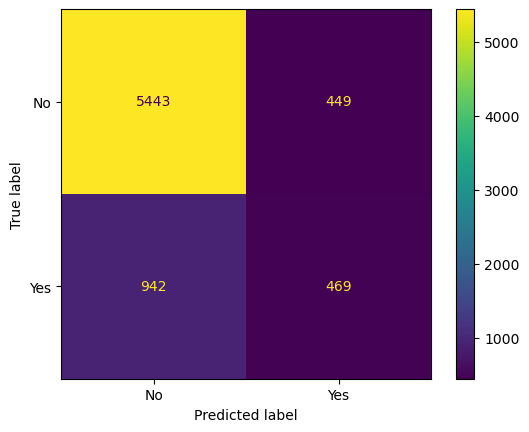

In [73]:
# Plotando matrix de confusão
ConfusionMatrixDisplay.from_estimator(rfc, X_test, y_test);

In [74]:
# Mostrando as métricas do modelo
print(f"Acúracia (Treino): {accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Acúracia (Treino): {accuracy_score(y_test, rfc.predict(X_test))}")
print("=" * 50)
print(f"Acúracia Balanceada (Treino): {balanced_accuracy_score(y_train, rfc.predict(X_train))}")
print(f"Acúracia Balanceada (Teste): {balanced_accuracy_score(y_test, rfc.predict(X_test))}")
print("=" * 50)
print(f"Precisão (Treino): {precision_score(y_train, rfc.predict(X_train), pos_label="Yes")}")
print(f"Precisão (Teste): {precision_score(y_test, rfc.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"Recall (Treino): {recall_score(y_train, rfc.predict(X_train), pos_label="Yes")}")
print(f"Recall (Teste): {recall_score(y_test, rfc.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"F1 Score (Treino): {f1_score(y_train, rfc.predict(X_train), pos_label="Yes")}")
print(f"F1 Score (Teste): {f1_score(y_test, rfc.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"ROCAUC: {roc_auc_score(y_train, rfc.predict_proba(X_train)[:, 1])}")
print(f"ROCAUC: {roc_auc_score(y_test, rfc.predict_proba(X_test)[:, 1])}")

Acúracia (Treino): 0.9965205584079433
Acúracia (Treino): 0.8095303300013693
Acúracia Balanceada (Treino): 0.9965205584079433
Acúracia Balanceada (Teste): 0.628091676638265
Precisão (Treino): 0.9974916032481612
Precisão (Teste): 0.5108932461873639
Recall (Treino): 0.9955446174735859
Recall (Teste): 0.332388377037562
F1 Score (Treino): 0.996517159361196
F1 Score (Teste): 0.4027479604980678
ROCAUC: 0.9998905930531524
ROCAUC: 0.6931327803125765


# Etapa 05) Modelagem dos Dados - Tunning

In [75]:
# Importando GridSearchCV
from sklearn.model_selection import GridSearchCV

In [79]:
# Definindo lista de hyperparametros
parameters = {
    "n_estimators": [200, 300],
    "min_samples_split": [2, 5],
    "min_samples_leaf": [1, 2, 4]
}

In [80]:
# Inicializando o GridSearchCV
search = GridSearchCV(rfc, param_grid=parameters, scoring="accuracy", cv=5, n_jobs=-1)

In [81]:
# Verificando o melhores hyperparametros para o modelo
search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5],
                         'n_estimators': [200, 300]},
             scoring='accuracy')

In [83]:
# Melhores hyperparametros
search.best_estimator_.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 200,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [84]:
# Recriando modelo tunado
model = RandomForestClassifier(
    bootstrap=True,
    ccp_alpha=0.0,
    class_weight=None,
    criterion='gini',
    max_depth=20,
    max_features='sqrt',
    max_leaf_nodes=None,
    max_samples=None,
    min_impurity_decrease=0.0,
    min_samples_leaf=1,
    min_samples_split=2,
    min_weight_fraction_leaf=0.0,
    monotonic_cst=None,
    n_estimators=200,
    n_jobs=None,
    oob_score=False,
    random_state=None,
    verbose=0,
    warm_start=False
)

In [85]:
# Treinando modelo tunado
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, n_estimators=200)

In [86]:
# Mostrando as métricas do modelo
print(f"Acúracia (Treino): {accuracy_score(y_train, model.predict(X_train))}")
print(f"Acúracia (Treino): {accuracy_score(y_test, model.predict(X_test))}")
print("=" * 50)
print(f"Acúracia Balanceada (Treino): {balanced_accuracy_score(y_train, model.predict(X_train))}")
print(f"Acúracia Balanceada (Teste): {balanced_accuracy_score(y_test, model.predict(X_test))}")
print("=" * 50)
print(f"Precisão (Treino): {precision_score(y_train, model.predict(X_train), pos_label="Yes")}")
print(f"Precisão (Teste): {precision_score(y_test, model.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"Recall (Treino): {recall_score(y_train, model.predict(X_train), pos_label="Yes")}")
print(f"Recall (Teste): {recall_score(y_test, model.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"F1 Score (Treino): {f1_score(y_train, model.predict(X_train), pos_label="Yes")}")
print(f"F1 Score (Teste): {f1_score(y_test, model.predict(X_test), pos_label="Yes")}")
print("=" * 50)
print(f"ROCAUC: {roc_auc_score(y_train, model.predict_proba(X_train)[:, 1])}")
print(f"ROCAUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])}")

Acúracia (Treino): 0.9671150337336105
Acúracia (Treino): 0.8073394495412844
Acúracia Balanceada (Treino): 0.9671150337336105
Acúracia Balanceada (Teste): 0.602209605163195
Precisão (Treino): 0.992836996910955
Precisão (Teste): 0.5026595744680851
Recall (Treino): 0.9410192217931854
Recall (Teste): 0.2678951098511694
F1 Score (Treino): 0.966233879400488
F1 Score (Teste): 0.34951456310679613
ROCAUC: 0.9978054044957576
ROCAUC: 0.6548634937497685


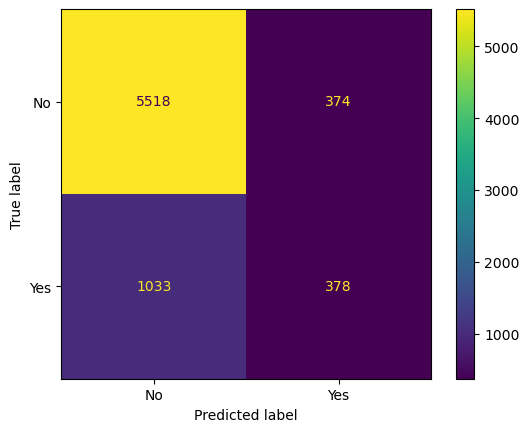

In [87]:
# Plotando matrix de confusão para modelo tunado
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test);